In [6]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

salary_df = pd.read_csv("Salary.csv")

In [7]:

#* Functions 
def age_group_funct(age):
    if 19 < age < 30:
        return "20 - 29"
    elif 29 < age < 40:
        return "30 - 39"
    elif 39 < age < 50:
        return "40 - 49"
    else: 
        return "50+"

def education_level_funct(num):
    if num == 0:
        return "High School"
    elif num == 1:
        return "Bachelor Degree"
    elif num == 2:
        return "Master Degree"
    else: 
        return "Phd"



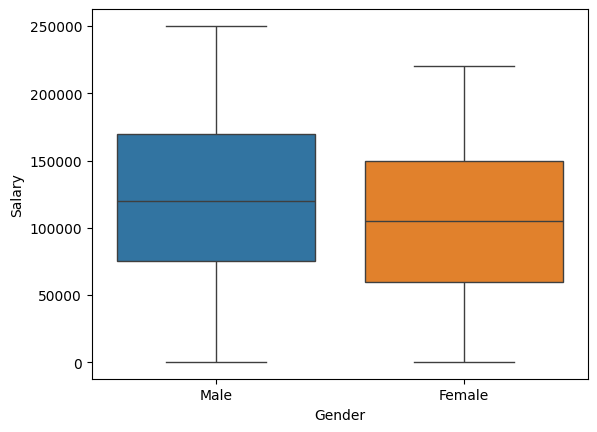

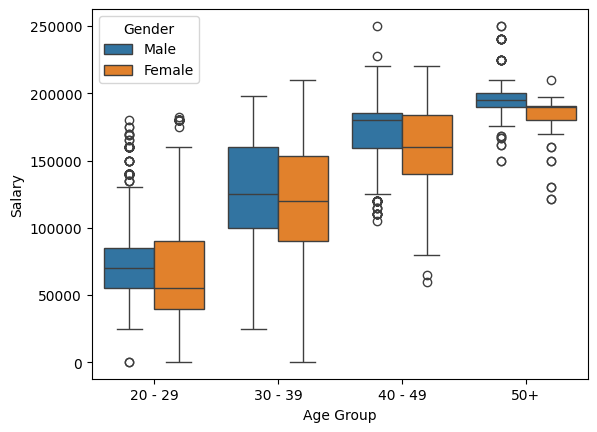

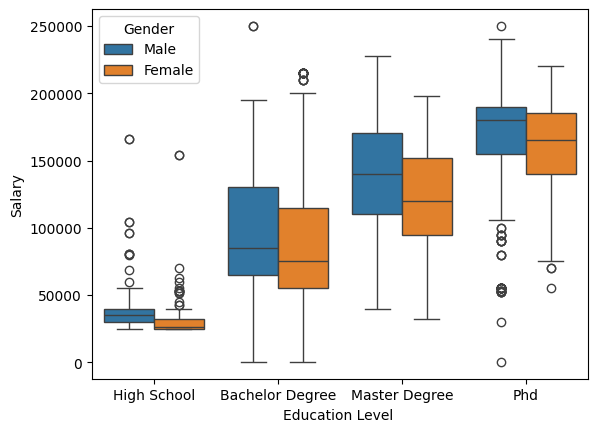

In [8]:

#* Showing Plots (Make sure I come back and put mark downs in between all of these!)

#! Basic Data
sns.boxplot(data = salary_df, x = "Gender", y = "Salary", hue = "Gender")
plt.show()
plt.close()

#! Age 
salary_df["Age Group"] = salary_df.Age.apply(age_group_funct)
age_order = ["20 - 29", "30 - 39", "40 - 49", "50+"]

sns.boxplot(data = salary_df, x = "Age Group", y = "Salary", order = age_order, hue="Gender")
plt.show()
plt.close()

#! Education Level
salary_df["Education Level "] = salary_df["Education Level"].apply(education_level_funct)
ed_order = ["High School", "Bachelor Degree", "Master Degree", "Phd"]

sns.boxplot(data = salary_df, x = "Education Level ", y = "Salary", order = ed_order, hue="Gender")
plt.show()
plt.close()